In [1]:
#Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import nltk
nltk.download('stopwords') 
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.decomposition import TruncatedSVD
import xgboost as xgb
import pickle

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## This Notebook covers: 
- Preprocessing the data
- tfidf
- count vector features
- Modeling
  1. logistic regression
  2. naive bayes
  3. svm
  4. xgboost
- Pickling files

In [2]:
#Read the Data
df_news=pd.read_excel('Headline_TOI.xlsx')
df_news.tail()

,Headline,Censor
1263,Unforgettable: Yusuf who debuted in 2007 WT20 ...,0
1264,38 died while cleaning sewers in Delhi in last...,1
1265,"Food brand Ketofy raises $250,000 in pre-Serie...",0
1266,Low-lying areas in Bihar flooded as Ganga's wa...,1
1267,"Trump criticises China, says it has broken pro...",0


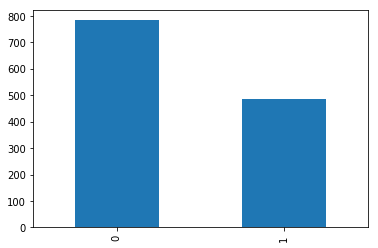

In [20]:
#Plotting the labels
df_news['Censor'].value_counts().plot.bar()

## Preprocessing the Data

In [4]:
#Removing Punctuations from the text
df_news.replace("[^a-zA-Z]"," ",regex=True, inplace=True)
df_news.head()

,Headline,Censor
0,Law against religious conversion,1
1,Woman sets baby ablaze,1
2,Submit project plans by Jan BMC,0
3,Nanded gets new revenue division tag,0
4,Several arts to beat together at NCPA,0


In [5]:
#Lower case the whole text
data=df_news['Headline'].str.lower()
df_news['Headline']=data
df_news.head()

,Headline,Censor
0,law against religious conversion,1
1,woman sets baby ablaze,1
2,submit project plans by jan bmc,0
3,nanded gets new revenue division tag,0
4,several arts to beat together at ncpa,0


In [6]:
# Removing the stop words
stop=stopwords.words('english')

df_news['Headline']=df_news['Headline'].apply(lambda x:" ".join(x for x in x.split() if x not in stop))

In [7]:
#splitting the data
X_train, X_test, y_train, y_test = train_test_split(df_news['Headline'], df_news['Censor'], 
                                                    test_size = 0.2, random_state = 42)


Let's start building our very first model.

Our very first model is a simple TF-IDF (Term Frequency - Inverse Document Frequency) followed by a simple Logistic Regression.

## TF-IDF

In [8]:
#Transorming input text using TF-IDF (Term Frequency - Inverse Document Frequency)
tfv = TfidfVectorizer(min_df=3,  max_features=None, 
            strip_accents='unicode',analyzer='word',
            ngram_range=(1, 3), use_idf=1,smooth_idf=1,sublinear_tf=1,
            #stop_words = 'english'
                     )

# Fitting TF-IDF to both training and test sets (semi-supervised learning)
tfv.fit(list(X_train) + list(X_test))
xtrain_tfv =  tfv.transform(X_train) 
xtest_tfv = tfv.transform(X_test)

## Count Vector

Instead of using TF-IDF, we can also use word counts as features. This can be done easily using CountVectorizer from scikit-learn.

In [9]:
#Transorming input text using Count Vectorizer or Bag of words
ctv = CountVectorizer(analyzer='word',
            ngram_range=(1, 1)#, stop_words = 'english'
                     )

# Fitting Count Vectorizer to both training and test sets (semi-supervised learning)
ctv.fit(list(X_train) + list(X_test))
xtrain_ctv =  ctv.transform(X_train) 
xtest_ctv = ctv.transform(X_test)

## Building Models <br>

### Logistic Regression

In [10]:
# Fitting a simple Logistic Regression on TFIDF
lr_tfv = LogisticRegression(C=1.0)
lr_tfv.fit(xtrain_tfv, y_train)
predictions = lr_tfv.predict(xtest_tfv)
score=accuracy_score(y_test,predictions)
print(score)

0.7519685039370079


C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [11]:
# Fitting a simple Logistic Regression on count vector
lr_ctv = LogisticRegression(C=1.0)
lr_ctv.fit(xtrain_ctv, y_train)
predictions = lr_ctv.predict(xtest_ctv)
score=accuracy_score(y_test,predictions)
print(score)

0.7716535433070866


### Naive Bayes

In [12]:
# Fitting a simple Naive Bayes on TFIDF
nb_tfv = MultinomialNB()
nb_tfv.fit(xtrain_tfv, y_train)
predictions = nb_tfv.predict(xtest_tfv)
score=accuracy_score(y_test,predictions)
print(score)

0.7598425196850394


In [13]:
# Fitting a simple Naive Bayes on Count vector
nb_ctv = MultinomialNB()
nb_ctv .fit(xtrain_ctv, y_train)
predictions = nb_ctv .predict(xtest_ctv)
score=accuracy_score(y_test,predictions)
print(score)

0.7362204724409449


### SVM

In [14]:
# Fitting a simple SVM with tf-idf
svc_tfv = SVC(C=1, probability=True) # since we need probabilities
svc_tfv.fit(xtrain_tfv, y_train)
predictions = svc_tfv.predict(xtest_tfv)
score=accuracy_score(y_test,predictions)
print(score)

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.6259842519685039


In [15]:
# Fitting a simple SVM with count vector
svc_ctv = SVC(C=1, probability=True) # since we need probabilities
svc_ctv.fit(xtrain_ctv, y_train)
predictions = svc_ctv.predict(xtest_ctv)
score=accuracy_score(y_test,predictions)
print(score)

0.6259842519685039


### XGB

In [16]:
# Fitting a simple xgboost on tf-idf
xgb_tfv = xgb.XGBClassifier(max_depth=7, n_estimators=200, colsample_bytree=0.8, 
                        subsample=0.8, nthread=10, learning_rate=0.1)
xgb_tfv.fit(xtrain_tfv.tocsc(), y_train)
predictions = xgb_tfv.predict(xtest_tfv.tocsc())
score=accuracy_score(y_test,predictions)
print(score)

0.7204724409448819


In [17]:
# Fitting a simple xgboost on CTV
xgb_ctv = xgb.XGBClassifier(max_depth=7, n_estimators=200, colsample_bytree=0.8, 
                        subsample=0.8, nthread=10, learning_rate=0.1)
xgb_ctv.fit(xtrain_ctv.tocsc(), y_train)
predictions = xgb_ctv.predict(xtest_ctv.tocsc())
score=accuracy_score(y_test,predictions)
print(score)

0.7204724409448819


## Pickling
Pickling files to be used while deploying using API

In [18]:
#we shortlist Linear regression model based on count vectoriser for further implementation
LRML = open("censor_predict.pkl","wb")
pickle.dump(lr_ctv,LRML)
LRML.close()

In [19]:
HT = open("headline_transform.pkl","wb")
pickle.dump(ctv,HT)
HT.close()